# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [3]:
# 데이터 로드
data = pd.read_csv("abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [5]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [6]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [13]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [10]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
preds = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age = preds + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test+1.5, age)
rmse = np.sqrt(mse)

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [12]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [18]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores  = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('##### ',ridge.__class__.__name__ , ' #####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

#####  Ridge  #####
 5 교차 검증의 평균 RMSE : 2.219 
#####  Ridge  #####
 5 교차 검증의 평균 RMSE : 2.205 
#####  Ridge  #####
 5 교차 검증의 평균 RMSE : 2.195 
#####  Ridge  #####
 5 교차 검증의 평균 RMSE : 2.348 
#####  Ridge  #####
 5 교차 검증의 평균 RMSE : 2.619 


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [19]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [20]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)

#예측값 구하기
pred2 = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
age2 = pred2 + 1.5

#MSE와 RMSE 구하기
mse2 = mean_squared_error(y_test, pred2)
rmse2 = np.sqrt(mse2)

print(mse2, rmse2)

[10:09:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4.932528774293606 2.2209297094445843


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

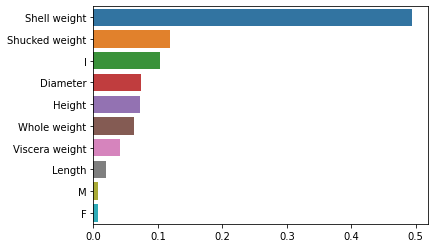

In [22]:
import seaborn as sns
%matplotlib inline

feature_series = pd.Series(data = xgb_reg.feature_importances_, index = data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y=feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [23]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [24]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [25]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape 
y_train.shape 

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [27]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [28]:
#기울기
lr_clf.coef_

array([[-1.99751167e-01,  3.65450552e-01,  1.49472112e-01,
        -1.88027149e-01, -2.28495646e-02,  1.95456485e-01,
         4.66701265e-01, -1.66796661e-02,  8.23897101e-02,
         6.75011473e-02, -1.92621856e-02,  2.94915749e-01,
         7.42524049e-03],
       [ 5.96475829e-01, -7.88672591e-01, -1.26181429e-01,
         2.12254654e-01, -1.13504800e-02,  3.15785912e-01,
         3.55147976e-01,  3.34675580e-02,  2.79035669e-01,
        -1.17202474e+00,  2.61165677e-01,  4.64731544e-01,
        -8.33633158e-03],
       [-3.96724662e-01,  4.23222039e-01, -2.32906833e-02,
        -2.42275051e-02,  3.42000446e-02, -5.11242396e-01,
        -8.21849241e-01, -1.67878919e-02, -3.61425379e-01,
         1.10452359e+00, -2.41903492e-01, -7.59647293e-01,
         9.11091084e-04]])

In [29]:
#절편
lr_clf.intercept_

array([-0.04177837,  0.09551046, -0.05373209])

3-3) 모델의 정확도를 구하세요.

In [30]:
#모델의 예측값 구하기
pred3 = lr_clf.predict(x_test)

#모델의 정확도 구하기
acc = metrics.accuracy_score(y_test, pred3)

In [31]:
print(f"예측값 : {pred3}")
print(f"정확도 : {acc}")

예측값 : [2 1 2 1 1 2 0 2 2 1 2 2 2 0 0 2 1 1 0 1 2 2 2 2 1 2 2 1 0 0 0 0 2 1 2 1 1
 0 1 1 2 2 0 0 1 0 0 1 1 1 1 2 2 1]
정확도 : 0.9629629629629629
